# Customer Service Request Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DF=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv',low_memory=False) #DF is the DataFrame
DF

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


In [3]:
DF.drop_duplicates(inplace=True) #Dropping duplicate rows if any

In [4]:
DF.shape

(300698, 53)

In [5]:
DF.size

15936994

#### Converting the columns ‘Created Date’ and Closed Date’ to datetime datatype.

In [6]:
from datetime import datetime

In [7]:
DF = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv", parse_dates=["Created Date", "Closed Date"],low_memory=False)

### Creating a new column 'Request_Closing_Time'

In [8]:
DF['Request_Closing_Time']=DF['Closed Date'] - DF['Created Date']


In [9]:
DF.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02


In [10]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 54 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unique Key                      300698 non-null  int64          
 1   Created Date                    300698 non-null  datetime64[ns] 
 2   Closed Date                     298534 non-null  datetime64[ns] 
 3   Agency                          300698 non-null  object         
 4   Agency Name                     300698 non-null  object         
 5   Complaint Type                  300698 non-null  object         
 6   Descriptor                      294784 non-null  object         
 7   Location Type                   300567 non-null  object         
 8   Incident Zip                    298083 non-null  float64        
 9   Incident Address                256288 non-null  object         
 10  Street Name                     256288 non-n

In [11]:
DF['City'].nunique()

53

In [12]:
DF['City'].value_counts()

BROOKLYN               98307
NEW YORK               65994
BRONX                  40702
STATEN ISLAND          12343
JAMAICA                 7296
ASTORIA                 6330
FLUSHING                5971
RIDGEWOOD               5163
CORONA                  4295
WOODSIDE                3544
SOUTH RICHMOND HILL     2774
OZONE PARK              2755
EAST ELMHURST           2734
ELMHURST                2673
WOODHAVEN               2464
MASPETH                 2462
LONG ISLAND CITY        2437
SOUTH OZONE PARK        2173
RICHMOND HILL           1904
FRESH MEADOWS           1899
QUEENS VILLAGE          1814
MIDDLE VILLAGE          1765
JACKSON HEIGHTS         1689
FOREST HILLS            1688
REGO PARK               1486
BAYSIDE                 1221
COLLEGE POINT           1220
FAR ROCKAWAY            1179
WHITESTONE              1098
HOLLIS                  1012
HOWARD BEACH             931
ROSEDALE                 922
SPRINGFIELD GARDENS      883
SAINT ALBANS             834
KEW GARDENS   

In [13]:
DF['Status'].value_counts()

Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64

## Visualizing the Status Of the Request

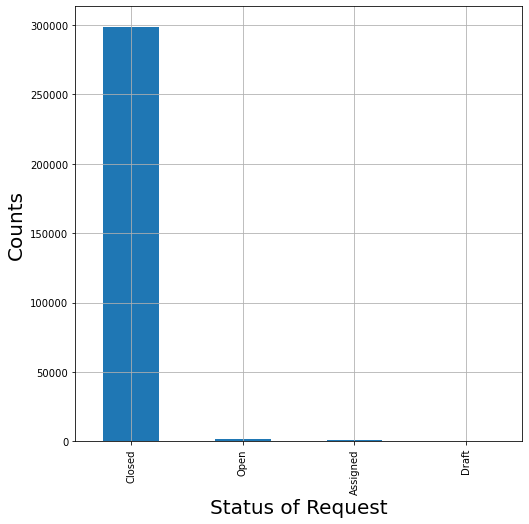

In [14]:
DF['Status'].value_counts().plot(kind='bar',figsize=(8,8))
plt.grid()
plt.xlabel('Status of Request',size=20)
plt.ylabel('Counts',size=20)
plt.show()

### DF2 shows the Grouped complaint types with respect to cities and their counts

In [15]:
DF2=pd.DataFrame({'No_Of_Time':DF.groupby(['Complaint Type','City']).size()})
DF2

No_Of_Time
Complaint Type City                     
Animal Abuse   ARVERNE                38
               ASTORIA               125
               BAYSIDE                37
               BELLEROSE               7
               BREEZY POINT            2
...                                  ...
Vending        STATEN ISLAND          25
               SUNNYSIDE              15
               WHITESTONE              1
               WOODHAVEN               6
               WOODSIDE               15

[764 rows x 1 columns]

Most Common Type Of Complaint

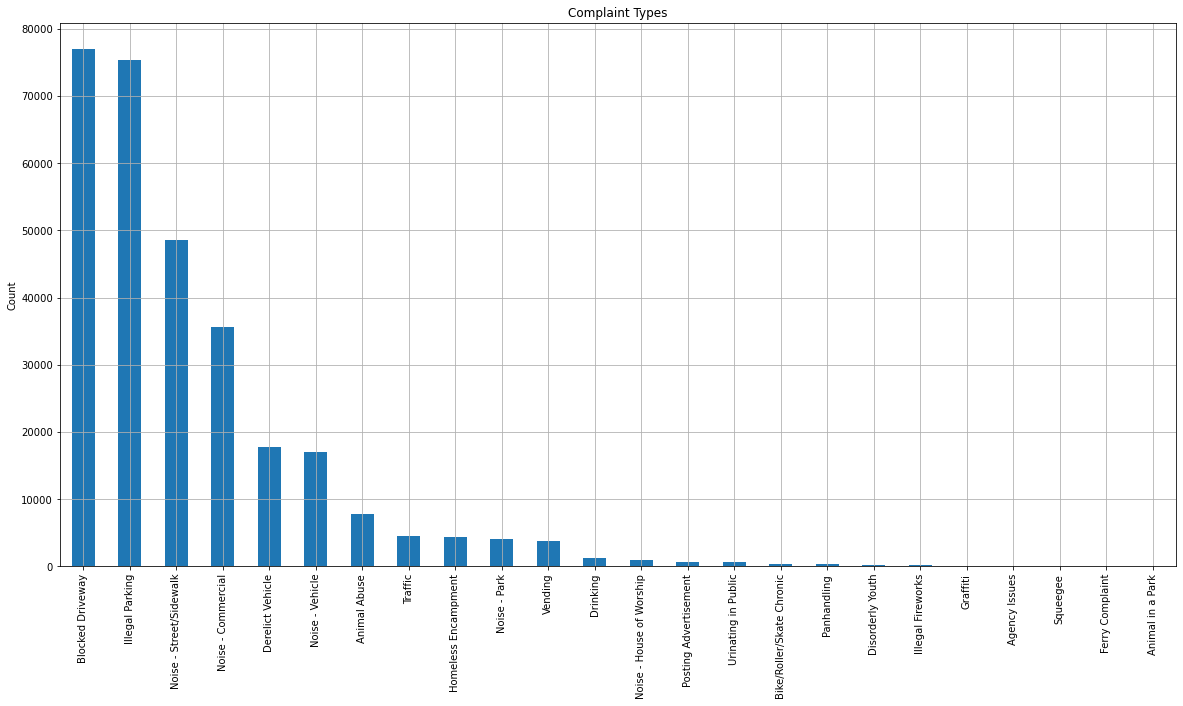

In [16]:
DF['Complaint Type'].value_counts().plot(kind = 'bar', figsize=(20, 10), title='Complaint Types', ylabel='Count', grid=True)
plt.show()

In [17]:
DF.Borough.unique()

array(['MANHATTAN', 'QUEENS', 'BRONX', 'BROOKLYN', 'Unspecified',
       'STATEN ISLAND'], dtype=object)

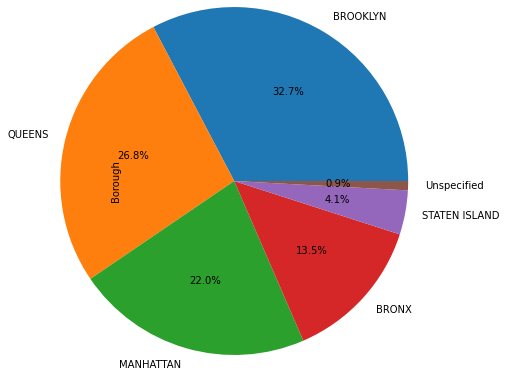

In [18]:
DF.Borough.value_counts().plot(kind='pie',radius=2,autopct='%.1f%%')
plt.show()

We can conclude that Brooklyn has the most complaints among other Borough

In [19]:
DF.groupby(['Borough','Complaint Type','Descriptor']).size()

Borough      Complaint Type         Descriptor               
BRONX        Animal Abuse           Chained                      132
                                    In Car                        36
                                    Neglected                    673
                                    No Shelter                    71
                                    Other (complaint details)    311
                                                                ... 
Unspecified  Noise - Vehicle        Engine Idling                 11
             Posting Advertisement  Vehicle                        1
             Traffic                Truck Route Violation          1
             Vending                In Prohibited Area             2
                                    Unlicensed                     5
Length: 288, dtype: int64

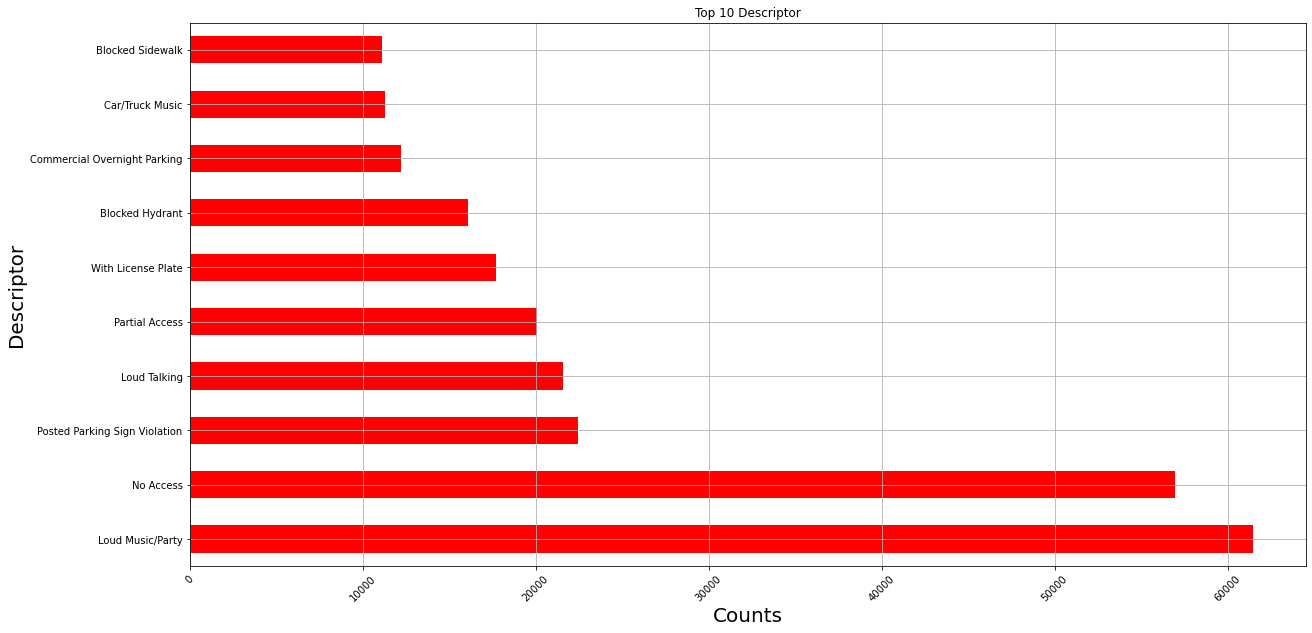

In [20]:
DF.Descriptor.value_counts().head(10).plot(kind='barh',figsize=(20,10),title='Top 10 Descriptor',color='Red',grid=True)
plt.xlabel('Counts',size=20)
plt.ylabel('Descriptor',size=20)
plt.xticks(rotation=45)
plt.show()

### DF3 shows the number of complaints 'Open or Closed' in a particular City

In [21]:
DF3=pd.DataFrame({'No_Of_Complaints':DF.groupby(['City','Status']).size()}).reset_index()
DF3

,City,Status,No_Of_Complaints
0,ARVERNE,Closed,220
1,ASTORIA,Closed,6330
2,Astoria,Closed,716
3,Astoria,Open,1
4,BAYSIDE,Assigned,2
...,...,...,...
79,WOODHAVEN,Closed,2462
80,WOODHAVEN,Open,2
81,WOODSIDE,Closed,3543
82,WOODSIDE,Open,1


### Average Request_Closing_Time For Different Cities And Complaint Types

In [22]:
data_avg_in_seconds = DF.groupby(['City', 'Complaint Type']).Request_Closing_Time.mean()
data_avg_in_seconds

City      Complaint Type         
ARVERNE   Animal Abuse              0 days 02:09:13.052631578
          Blocked Driveway          0 days 02:31:33.485714285
          Derelict Vehicle          0 days 02:58:05.592592592
          Disorderly Youth             0 days 03:35:28.500000
          Drinking                            0 days 00:14:19
                                               ...           
Woodside  Blocked Driveway          0 days 06:24:22.363636363
          Derelict Vehicle                    0 days 04:58:00
          Illegal Parking              0 days 05:13:09.130000
          Noise - Commercial                  0 days 02:23:39
          Noise - Street/Sidewalk      0 days 03:24:40.600000
Name: Request_Closing_Time, Length: 764, dtype: timedelta64[ns]

## Testing Hypothesis

#### Whether the average response time across complaint types is similar or not 

#### 1) Null Hypothesis = There is no significant different in mean of Request_Closing_Time for different Complaint.
#### 2)Alternate Hypothesis = There is signficant different in mean of Request_Closing_Time for different Complaint

In [23]:
from scipy.stats import f_oneway

In [24]:
DF['Request_Closing_Time_seconds']=DF['Request_Closing_Time'].astype('timedelta64[s]')

In [25]:
DF.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [26]:
DF4=DF[['Complaint Type','Request_Closing_Time_seconds']]
DF4.dropna(subset=['Request_Closing_Time_seconds'],inplace=True)


C:\Users\NAVAL\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [27]:
DF4.groupby('Complaint Type').Request_Closing_Time_seconds.mean().sort_values(ascending=True)

Complaint Type
Posting Advertisement        7.112892e+03
Illegal Fireworks            9.940101e+03
Noise - Commercial           1.132976e+04
Noise - House of Worship     1.149587e+04
Noise - Park                 1.227864e+04
Noise - Street/Sidewalk      1.240281e+04
Traffic                      1.241525e+04
Disorderly Youth             1.281090e+04
Noise - Vehicle              1.292038e+04
Urinating in Public          1.305599e+04
Bike/Roller/Skate Chronic    1.355926e+04
Drinking                     1.390260e+04
Vending                      1.445011e+04
Squeegee                     1.456425e+04
Homeless Encampment          1.571605e+04
Panhandling                  1.574196e+04
Illegal Parking              1.620415e+04
Blocked Driveway             1.706726e+04
Animal Abuse                 1.876768e+04
Agency Issues                1.893717e+04
Graffiti                     2.574450e+04
Derelict Vehicle             2.651090e+04
Animal in a Park             1.212605e+06
Name: Request_Closi

In [28]:
complaint=DF4['Complaint Type']
mean=DF4['Request_Closing_Time_seconds']

In [29]:
a=complaint=='Posting Advertisement'
b=complaint=='Illegal Fireworks'
c=complaint=='Noise - Commercial'
d=complaint=='Noise - House of Worship'
e=complaint=='Noise - Park'
f=complaint=='Noise - Street/Sidewalk'
g=complaint=='Traffic'
h=complaint=='Disorderly Youth'
i=complaint=='Noise - Vehicle'
j=complaint=='Urinating in Public'
k=complaint=='Bike/Roller/Skate Chronic'
l=complaint=='Drinking'
m=complaint=='Vending'
n=complaint=='Squeegee'
o=complaint=='Panhandling'
p=complaint=='Illegal Parking'
q=complaint=='Blocked Driveway'
r=complaint=='Animal Abuse'
s=complaint=='Agency Issues'
t=complaint=='Graffiti'
u=complaint=='Derelict Vehicle'
v=complaint=='Animal in a Park'

In [30]:
sample1=mean[a]
sample2=mean[b]
sample3=mean[c]
sample4=mean[d]
sample5=mean[e]
sample6=mean[f]
sample7=mean[g]
sample8=mean[h]
sample9=mean[i]
sample10=mean[j]
sample11=mean[k]
sample12=mean[l]
sample13=mean[m]
sample14=mean[n]
sample15=mean[o]
sample16=mean[p]
sample17=mean[q]
sample18=mean[r]
sample19=mean[s]
sample20=mean[t]
sample21=mean[u]
sample22=mean[v]

In [31]:
f_oneway(sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,sample10,sample11,sample12,sample13,sample14,sample15,sample16,sample17,sample18,sample19,sample20,sample21,sample22)

F_onewayResult(statistic=537.1508952007879, pvalue=0.0)

### Since, p-value is less than <= 0.05(5%)
#### We reject the Null Hypothesis and accept the Alternate Hypothesis

## Chi Square Test

#### 1) Null Hypothesis = Type of complaint or service requested and location are not related.
#### 2)Alternate Hypothesis = Type of complaint or service requested and location are related.

In [32]:
Chitest=pd.crosstab(DF['City'], DF['Complaint Type'])

In [33]:
Chitest

Complaint Type,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,38,0,0,35,27,2,1,1,4,0,...,11,2,29,7,1,0,0,0,1,1
ASTORIA,125,0,15,2618,351,3,35,4,32,4,...,19,61,386,204,1,1,0,47,9,54
Astoria,0,0,0,116,12,0,0,0,0,0,...,0,0,114,0,0,0,0,0,0,0
BAYSIDE,37,0,0,377,198,1,1,3,2,0,...,2,4,15,16,0,0,0,9,0,2
BELLEROSE,7,0,1,95,89,2,1,0,1,1,...,1,1,13,10,1,1,0,7,1,0
BREEZY POINT,2,0,0,3,3,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
BRONX,1415,0,20,12755,1953,63,188,9,247,24,...,79,547,8892,3396,19,17,0,355,51,379
BROOKLYN,2394,0,111,28148,5181,72,257,43,857,61,...,340,1555,13356,5177,49,45,0,1085,136,515
CAMBRIA HEIGHTS,11,0,0,147,115,0,0,0,5,1,...,2,0,25,77,0,0,0,6,0,0


In [34]:
import scipy.stats as stats

In [35]:
stat,pval,dof,expected=stats.chi2_contingency(Chitest)

In [36]:
print('The Degrees of Freedom are : {}'. format(dof))
print('The P-Value of the Testing is : {}'.format(pval))
print('Expected values : \n')
print(expected)

The Degrees of Freedom are : 1092
The P-Value of the Testing is : 0.0
Expected values : 

[[5.73241100e+00 7.38046993e-04 3.11455831e-01 ... 3.31752124e+00
  4.36923820e-01 2.80088834e+00]
 [1.64937098e+02 2.12356249e-02 8.96143369e+00 ... 9.54541337e+01
  1.25714899e+01 8.05891963e+01]
 [1.86824486e+01 2.40536225e-03 1.01506287e+00 ... 1.08121033e+01
  1.42397445e+00 9.12834973e+00]
 ...
 [6.42030032e+01 8.26612633e-03 3.48830531e+00 ... 3.71562378e+01
  4.89354679e+00 3.13699494e+01]
 [9.23439299e+01 1.18892661e-02 5.01727030e+00 ... 5.34422512e+01
  7.03844554e+00 4.51197649e+01]
 [3.12676964e+00 4.02571087e-04 1.69884999e-01 ... 1.80955704e+00
  2.38322084e-01 1.52775728e+00]]


### Since, p-value is less than <= 0.05(5%)
#### We reject the Null Hypothesis and accept the Alternate Hypothesis

Thank You!